<a href="https://colab.research.google.com/github/PauloGuz/Cuadernos-/blob/main/Parcial_1_Se%C3%B1ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

b). Cual es la senal obtenida en tiempo discreto al utilizar un ˜
conversor analogo digital con frecuencia de muestreo de ´
5kHz, aplicado a la senal continua ˜ x(t) = 3 cos(1000πt) +
5 sin(2000πt) + 10 cos(11000πt)?. Realizar la simulacion´
del proceso de discretizacion.

<ipython-input-44-554913e7fb3d>:21: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_muestreo, valores_muestreados, label='Señal muestreada', use_line_collection=True)


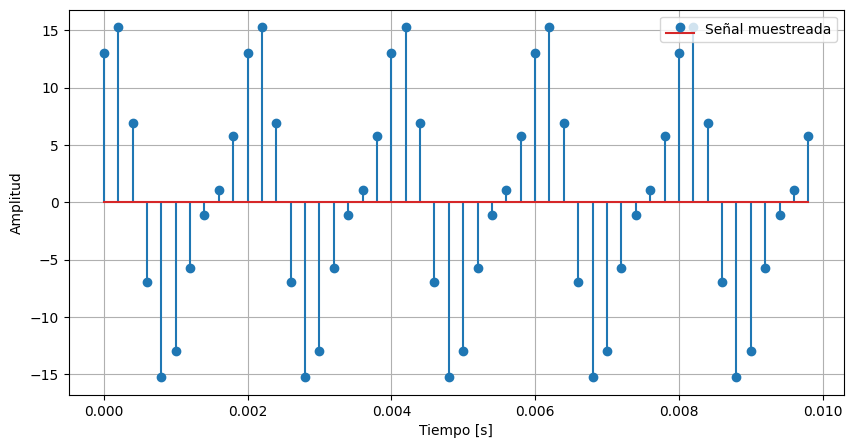

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal continua
def x(t):
    return 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)

# Definir el rango de tiempo continuo
t_continuo = np.linspace(0, 0.01, 1000)  # Duración de 0.01 segundos

# Muestrear la señal continua a una frecuencia de muestreo de 5 kHz
frecuencia_muestreo = 5000  # Hz
t_muestreo = np.arange(0, 0.01, 1 / frecuencia_muestreo)

# Obtener los valores muestreados de la señal continua
valores_muestreados = x(t_muestreo)

# Plotear la señal continua y la señal muestreada
plt.figure(figsize=(10, 5))
#plt.plot(t_continuo, x(t_continuo), label='Señal continua')
plt.stem(t_muestreo, valores_muestreados, label='Señal muestreada', use_line_collection=True)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
#plt.title('Muestreo de la señal continua')
plt.legend()
plt.grid(True)
plt.show()


c). Implemente una simulacion para encontrar la salida del sis- ´
tema lineal e invariante al tiempo H{·}, con respuesta al
escalon´ hϵ[n] = {2, 4, 1, 5, 0, 10}, n ∈ Z, ante la entrada
analoga en corriente ´ x(t) = 20(cos(t/3) + cos(t/4)) [A].
A: Amperios. Incluya los acondicionamientos necesarios de
discretizacion y cuantizaci ´ on, asumiendo un microprocesa- ´
dor de 4 bits con entrada analoga de 4mA a 20mA.

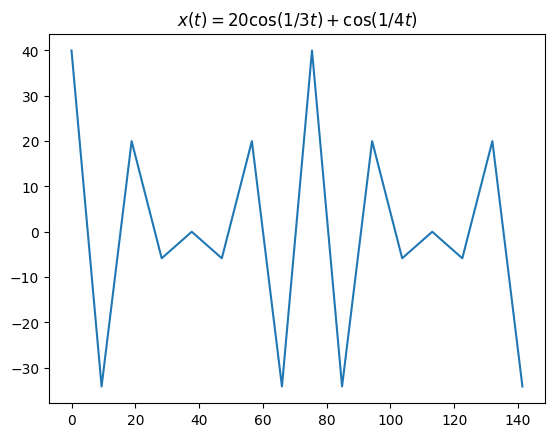

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interact #crear graficos interactivos
#Definir parámetros de la simulación
w1 = 1/3
w2 = 1/4
#Periodos de la señal
T1 = 6*np.pi
T2 = 8*np.pi

#Periodo señal cuasiperiodica
T = 24*np.pi
#Frecuencias
F1 = 1/T1
F2 = 1/T2

#Fs: frecuencia muestreo
Fs = 2* F1
Ts = 1/Fs #periodo muestreo

t = np.arange(0,2*T,Ts) #vector de tiempo que incluye dos periodos cuasiperiódica
x = 20*np.cos(w1*t) + 20*np.cos(w2*t)

plt.plot(t,x)
plt.title('$x(t)=20 \cos(1/3 t) + \cos(1/4 t)$')
plt.show()

In [ ]:
#cero y pendiente
def my_ceropen(x,ymin = 0, ymax = 30): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  y = m*x + c
  return y

In [ ]:
#llamdo a cero y pendiente
y =  my_ceropen(x,ymin = 0.004, ymax = 0.02)

In [ ]:
from scipy.spatial.distance import cdist #función para estimar distancia punto discretizado al vector de estados
#función cuantización punto a punto
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados
  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [ ]:
#número de bits y vector de cuantización
nbits = 4
rmin = 0.004
rmax = 0.02
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#recorrer vector cero y pendiente discretizado para cuantizar
for i in range(y.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(y[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(y[i],ve)) #apilar datos cuantizando si i>0

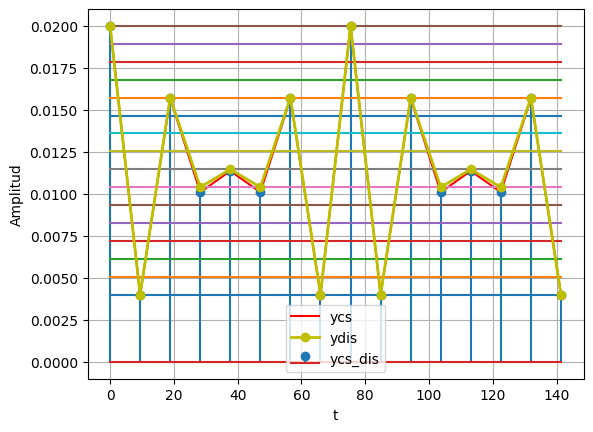

In [ ]:
#graficar señales
plt.plot(t,y,c='r', label='ycs')#cs continua
plt.stem(t,y, label='ycs_dis')#cs discreta
#estados de cuantización
for v in ve:
  plt.plot(t,v*np.ones(len(t)))
# graficar señal Digital (discreta + cuantizada)

plt.plot(t,yq,c='y',marker='o',label='ydis', linewidth=2)
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

In [ ]:
#crear señales
#h = np.array([1,-2,0,1,-2]).reshape(-1,1)#np.r_[np.zeros((5,1)),np.ones((5,1)),np.zeros((5,1))] # se genera un pulso rectangular
hu = np.array([2,4,1,5,0,10])
h = np.diff(hu).reshape(-1,1)

def convgraf(h,ydis): #función general para pintar proceso de convolución de forma interactiva
   lydis = len(ydis)
   lh = len(h)
   M = 2*lydis+lh # se genera un vector de tamaño completo para visualizar todo el proceso paso a paso
   xm = np.zeros((M,M))
   hm = np.r_[np.zeros((lydis,1)),h,np.zeros((lydis,1))]
   ym = np.zeros((M,M))
   for i in range(M-lydis+1):
     #print(i)
     xm[i:i+lydis,i] = np.flip(x).reshape(-1)#filp realizar el proceso de reflejo sobre arreglos discretos
     ym[i,i] = xm[:,i].T.dot(hm) #multiplicacion entre vectores -> producto punto
   return xm, ym, hm

def plot_conv(k,xm,ym,hm): #dibujar arreglos
     plt.stem(xm[:,k],markerfmt='+',label='$x[k]$')
     plt.stem(hm,linefmt='g',markerfmt='.',label='$h[n-k]$')
     plt.stem(ym[:k,:].sum(axis=0),markerfmt='s',linefmt='r',label='$y[n]=\sum^{\infty}_{k=-\infty}x[k]h[n-k]$')
     plt.legend()
     plt.show()
     return

xm, ym, hm = convgraf(h,x)

<ipython-input-51-250c44976baa>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ym[i,i] = xm[:,i].T.dot(hm) #multiplicacion entre vectores -> producto punto


In [ ]:
#@interact(m=range(xm.shape[0]-len(x)+1)) #define panel tipo selección en el gráfico interactivo
@interact(k=(0, xm.shape[0]-len(x), 1))
def show_frame(k=0):
    plot_conv(k,xm,ym,hm)
plt.show()

interactive(children=(IntSlider(value=0, description='k', max=21), Output()), _dom_classes=('widget-interact',…